# Part II - Ford GoBike System Data Exploration
## by Dorcas Misango

## Investigation Overview


In this investigation i would like to analyse the dataset especially where and at what time are most trips taken, and what kind of characteristics do these riders posses(sex, age, and user_type). 

## Dataset Overview

This dataset includes 183,412 trips with 16 features. After cleaning the dataset had 10 rows i.e features:
- duration_sec 
- start_time 
- end_time 
- start_station_name 
- end_station_name 
- bike_id 
- user_type 
- member_birth_year
- member_gender
- bike_share_for_all_trip

New rows were also added to the dataset :
- start_weekday
- start_hour
- end_hour
- duration_minutes

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('fordgobike_clean1.csv')
bike_df.sample(10)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
19309,660,2019-02-26 17:08:49.269,2019-02-26 17:19:50.163,S Van Ness Ave at Market St,Jackson Playground,5249,Subscriber,1979.0,Male,No
74890,277,2019-02-19 09:41:05.892,2019-02-19 09:45:43.112,Broadway at 30th St,19th Street BART Station,1474,Subscriber,1974.0,Male,No
14665,413,2019-02-27 11:36:37.987,2019-02-27 11:43:31.361,16th St Mission BART,24th St at Bartlett St,953,Subscriber,1981.0,Male,No
7506,557,2019-02-28 08:59:23.419,2019-02-28 09:08:40.910,Mission Playground,San Francisco City Hall (Polk St at Grove St),2692,Subscriber,1994.0,Male,No
175607,1462,2019-02-02 13:39:17.301,2019-02-02 14:03:39.655,Turk St at Fillmore St,20th St at Bryant St,4996,Customer,1980.0,Other,No
46898,472,2019-02-22 09:14:31.058,2019-02-22 09:22:23.342,Powell St BART Station (Market St at 4th St),Berry St at 4th St,6456,Subscriber,1986.0,Male,No
27972,477,2019-02-25 09:04:02.310,2019-02-25 09:11:59.323,14th St at Mandela Pkwy,Frank H Ogawa Plaza,843,Subscriber,1994.0,Male,No
102031,640,2019-02-14 16:56:41.941,2019-02-14 17:07:21.988,Bancroft Way at College Ave,Woolsey St at Sacramento St,4596,Subscriber,1988.0,Male,No
95202,551,2019-02-15 14:37:48.901,2019-02-15 14:47:00.468,California St at University Ave,Bancroft Way at Telegraph Ave,6403,Subscriber,1995.0,Other,Yes
43090,206,2019-02-22 17:03:26.858,2019-02-22 17:06:53.516,2nd St at Townsend St,Beale St at Harrison St,6291,Subscriber,1974.0,Female,No


In [4]:
# clean the dataset by changing some columns to the following datatypes
# to datetime
bike_df.start_time = pd.to_datetime(bike_df.start_time)
bike_df.end_time = pd.to_datetime(bike_df.end_time)
# to object/string
bike_df.bike_id = bike_df.bike_id.astype('str')

# to category
bike_df.user_type = bike_df.user_type.astype('category')

In [5]:
# new useful columns

#start_time broken down into months, days and hours
bike_df['start_month'] = bike_df.start_time.dt.month
bike_df['start_day'] = bike_df.start_time.dt.weekday 
bike_df['start_hour'] = bike_df.start_time.dt.hour

# from end_time
bike_df['end_hour'] = bike_df.end_time.dt.hour

# from duration_sec to duration_minutes
bike_df['duration_minutes'] = bike_df['duration_sec']/60

# 2. Create ages
bike_df['age'] = bike_df['member_birth_year'].apply(lambda x: 2019 - x)


In [8]:
# labels to use in plots for days
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# color to use in plots 
base_color = sb.color_palette()[0]

In [9]:
def x_y_t(xL,yL,title):
    plt.title(title)
    plt.xlabel(xL)
    plt.ylabel(yL)
    color = sb.color_palette()[2]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike Usage 

### Duration of bike rides
Most trips lasted for about 4-6 minutes and very few were longer than an hour.

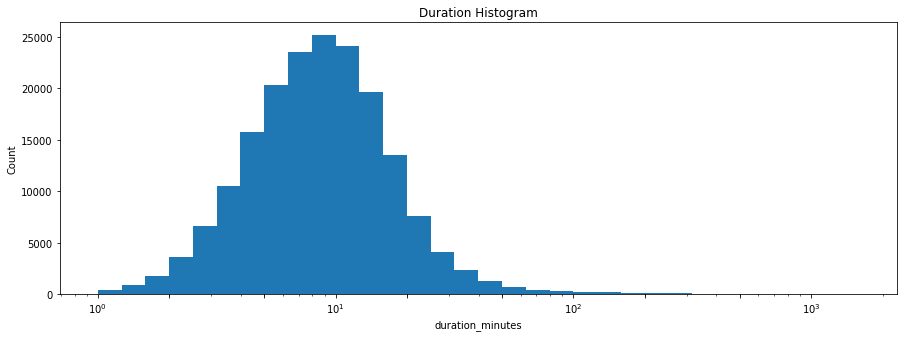

In [10]:
# histogram with logarithmic scale transformation
plt.figure(figsize=[15,5])
bin_edges = 10 ** np.arange(0.0, np.log10(bike_df.duration_minutes.max())+0.1, 0.1)
plt.hist(data = bike_df, x = 'duration_minutes', bins = bin_edges)
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs)
x_y_t('duration_minutes','Count','Duration Histogram')

### Bike Usage (per day)
Contrary to what i believed the most popular days to begin rides were not the weekends and are actually weekdays, to be specific Thursday and Tuesday.

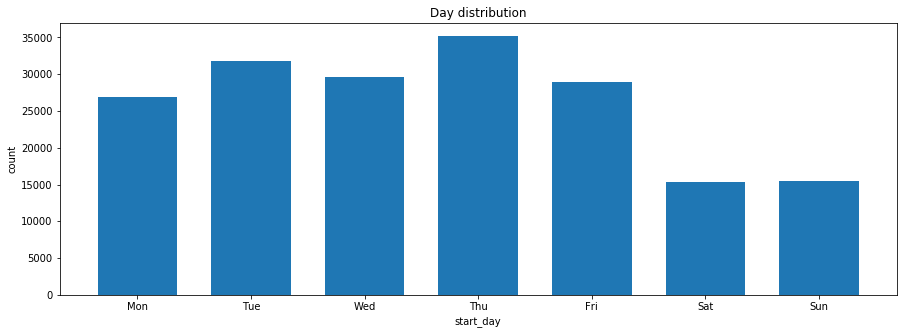

In [11]:
# plot a histogram for days with gaps between bars
plt.figure(figsize=[15,5])
bin_edges = np.arange(-0.5, 6.5+1, 1)
plt.hist(data = bike_df, x = 'start_day', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 6+1, 1), day_labels)
x_y_t('start_day','count','Day distribution')

### Bike Usage (per hour)
The number of trips gradually decreases during the later hours(after 7pm). During the day, there are more trips in the morning and evening.

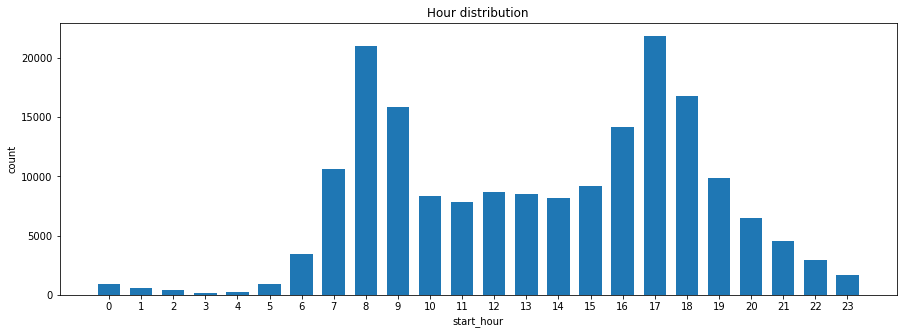

In [12]:
# plot a histogram with gaps between bars
plt.figure(figsize=[15,5])
bin_edges = np.arange(-0.5, 23.5+1, 1)
plt.hist(data = bike_df, x = 'start_hour', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 23+1, 1))
x_y_t('start_hour','count','Hour distribution')

### Bike usage in each user type and gender
subscribes are more likey to go on rides as compared to customers. men go on more rides as compared to women and others

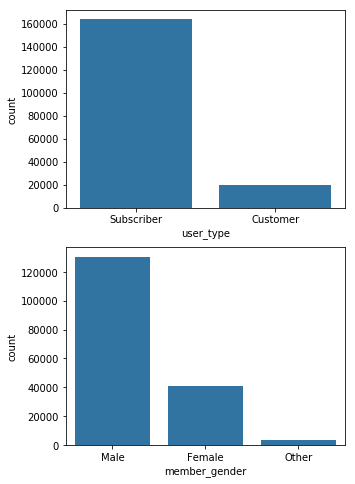

In [14]:
# plot a bar chart
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
user_type_order = bike_df['user_type'].value_counts().index
sb.countplot(data = bike_df, x = 'user_type', color = base_color, order = user_type_order);

ax = plt.subplot(212)
# plot a bar chart
member_gender_order = bike_df['member_gender'].value_counts().index
sb.countplot(data = bike_df, x = 'member_gender', color = base_color, order = member_gender_order);

### bike usage based on age 
Most trips were traken by people in their thirties.

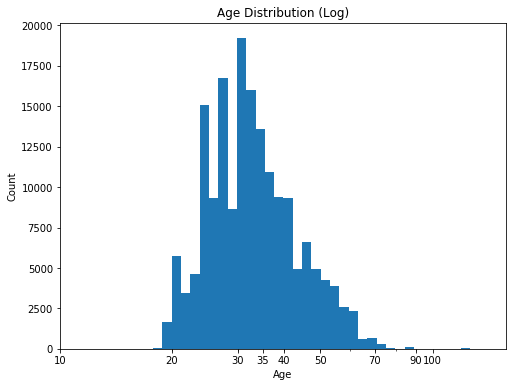

In [16]:
bike_df.dropna(subset=['age'], inplace = True)
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(bike_df['age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = bike_df, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
x_y_t('Age','Count','Age Distribution (Log)')

## Most popular start stations

### Most popular station per day
The most popular station( Market St at 10th St) had the most traffic on Thursday. the other top stations also hasd the most traffic on either Tuesday or Thursday.

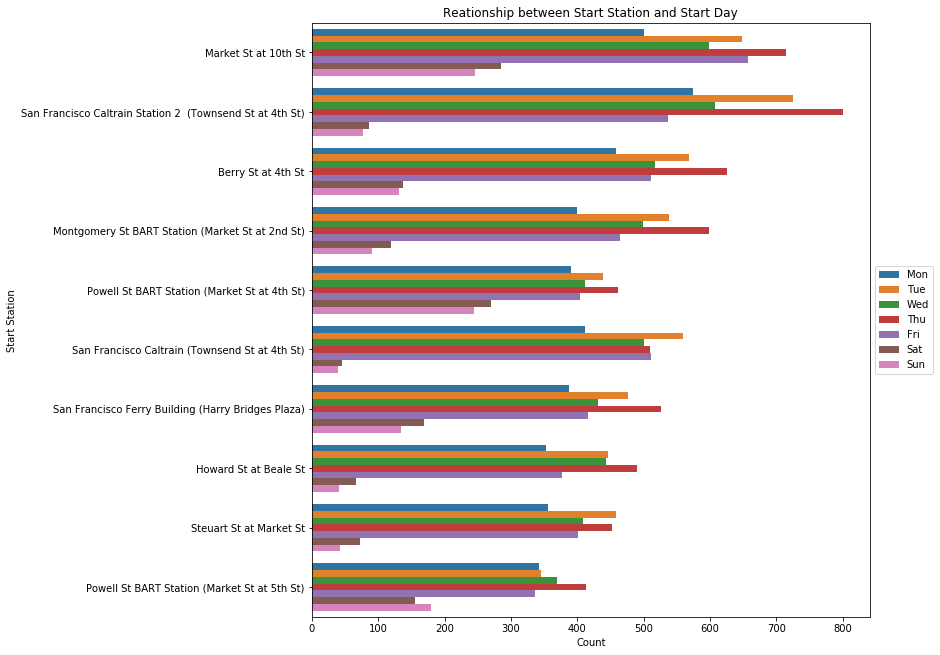

In [17]:
start_order = bike_df['start_station_name'].value_counts().index[:10]
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.95)
sb.countplot(data=bike_df, y='start_station_name', hue='start_day', order = start_order)
plt.legend(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], loc='center left', bbox_to_anchor=(1,0.5))
x_y_t('Count','Start Station','Reationship between Start Station and Start Day')

### Most popular station by user type and gender
The most frequent user types in the popular stations were the subscribers.<br>
The most frequent gender were the males.


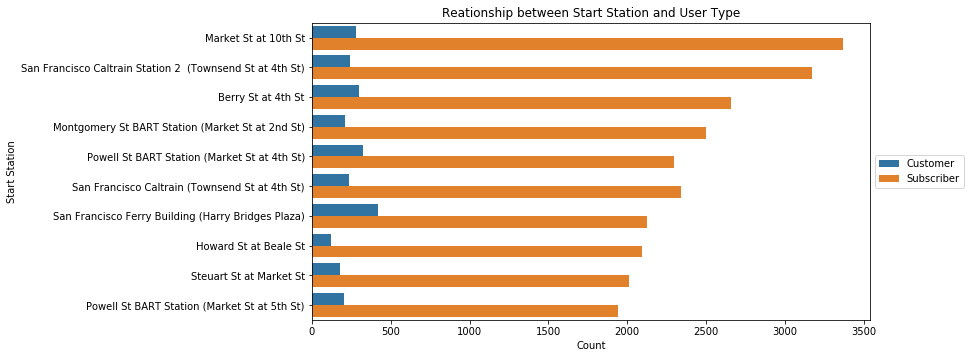

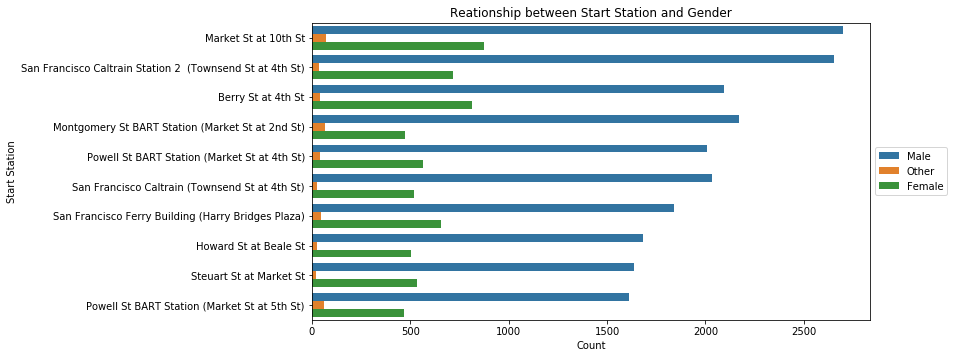

In [19]:
start_order = bike_df['start_station_name'].value_counts().index[:10]
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=0.95)
sb.countplot(data=bike_df, y='start_station_name', hue='user_type', order = start_order)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
x_y_t('Count','Start Station','Reationship between Start Station and User Type')

fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=0.95)
sb.countplot(data=bike_df, y='start_station_name', hue='member_gender', order = start_order)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
x_y_t('Count','Start Station','Reationship between Start Station and Gender')

### Most Popular Start Station Bases on Age 
From the plots above we see that bike riding seems to be popular among people in the thirties.

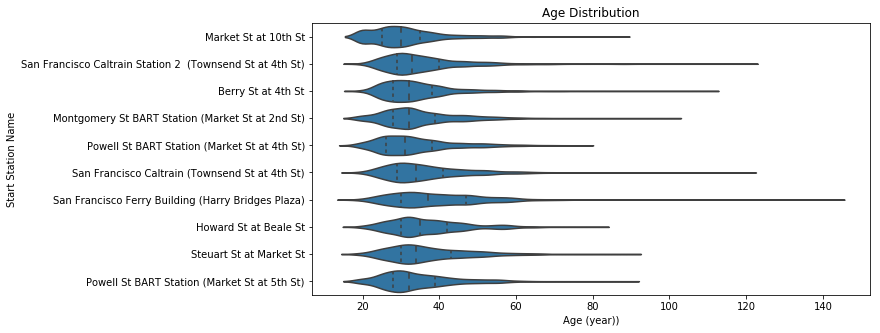

In [21]:
start_order = bike_df['start_station_name'].value_counts().index[:10]
plt.figure(figsize=(10,5))
sb.violinplot(data=bike_df, y='start_station_name', x='age', inner='quartile', order = start_order, color=base_color)
x_y_t('Age (year))','Start Station Name','Age Distribution')

## Popular Days

### User bike rides based on days
Customer rides lasted longer than subscriber rides especially on weekends.<br>
The other gender had longer trips compared to males and females especially on the weekends.

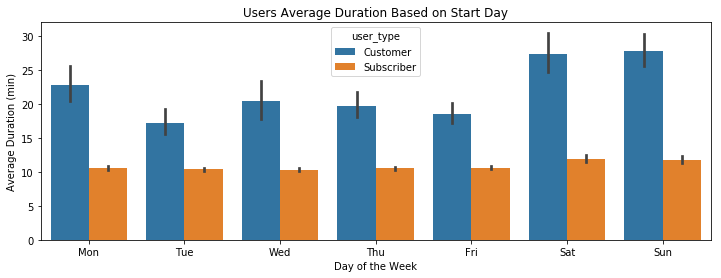

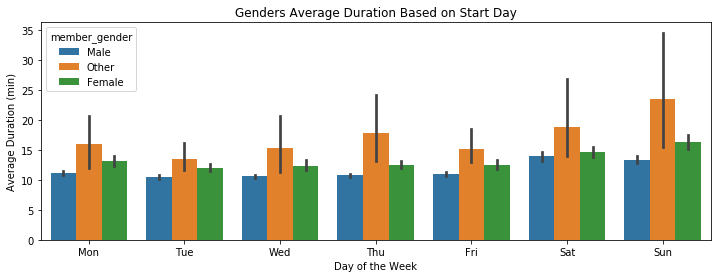

In [22]:
plt.figure(figsize=[12,4])
sb.barplot(x="start_day",y="duration_minutes", hue ="user_type", data=bike_df);
plt.xticks(np.arange(0,7), day_labels)
x_y_t('Day of the Week','Average Duration (min)','Users Average Duration Based on Start Day')


plt.figure(figsize=[12,4])
sb.barplot(x="start_day",y="duration_minutes", hue ="member_gender", data=bike_df);
plt.xticks(np.arange(0,7), day_labels)
x_y_t('Day of the Week','Average Duration (min)','Genders Average Duration Based on Start Day')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [23]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | pattern 'Part_II_slide_deck_template.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook